In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

In [2]:
import matplotlib as mpl
#mpl.rcParams['font.sans-serif'] = ['KaiTi']
plt.rcParams['font.sans-serif']=['SimHei'] #图中文字体设置为黑体
mpl.rcParams['font.serif'] = ['KaiTi']
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题,或者转换负号为字符串

import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['KaiTi', 'Arial']})   #这是方便seaborn绘图得时候得字体设置

In [3]:
#显示全部特征
pd.set_option('display.max_columns', None)

In [4]:
# 查看数据集各特征字段，其他指标主要可以分为三种类型的数据指标：

#     用户相关特征：访问时长、访问次数、访问酒店数、使用时间、价格偏好、星级偏好、消费能力、价格敏感指数、用户价值
#     酒店相关特征：独立访问用户数、评论人数、评论数、历史取消率、酒店平均价格、最低价、商务属性指数等
#     订单相关特征：历史订单数、取消率、下单距离时长、访问日期、入住日期等

In [5]:
df = pd.read_csv('E:/携程数据/yhxwfx_data/userlostprob_train.txt',sep='\t')
print(df.head())
#一个sampleId代表的是一个用户访问一家酒店产生的一条数据；
#该Sampleid对应的label代表用户当天是否成功下单，1为有下单，0为未下单；
#举个例子： 如果用户小王在2016年5月20日按照顺序访问了A,B,C,D四家酒店，最后选择了D下单。
#则对应我们的数据，他会产生4条记录（即4个sampleId），四条记录的label都会为1.

   label  sampleid           d     arrival  iforderpv_24h  decisionhabit_user  \
0      0     24636  2016-05-18  2016-05-18              0                 NaN   
1      1     24637  2016-05-18  2016-05-18              0                 NaN   
2      0     24641  2016-05-18  2016-05-19              0                 NaN   
3      0     24642  2016-05-18  2016-05-18              0                 NaN   
4      1     24644  2016-05-18  2016-05-19              0                 NaN   

   historyvisit_7ordernum  historyvisit_totalordernum  hotelcr  \
0                     NaN                         NaN     1.04   
1                     NaN                         NaN     1.06   
2                     NaN                         NaN     1.05   
3                     NaN                         NaN     1.01   
4                     NaN                         NaN     1.00   

   ordercanceledprecent  landhalfhours  ordercanncelednum  commentnums  \
0                   NaN           22.0    

In [6]:
df.shape

(689945, 51)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689945 entries, 0 to 689944
Data columns (total 51 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   label                             689945 non-null  int64  
 1   sampleid                          689945 non-null  int64  
 2   d                                 689945 non-null  object 
 3   arrival                           689945 non-null  object 
 4   iforderpv_24h                     689945 non-null  int64  
 5   decisionhabit_user                385450 non-null  float64
 6   historyvisit_7ordernum            82915 non-null   float64
 7   historyvisit_totalordernum        386525 non-null  float64
 8   hotelcr                           689148 non-null  float64
 9   ordercanceledprecent              447831 non-null  float64
 10  landhalfhours                     661312 non-null  float64
 11  ordercanncelednum                 447831 non-null  f

In [8]:
df.label.value_counts()
#500588条未下单记录，189457条下单记录

0    500588
1    189357
Name: label, dtype: int64

In [9]:
df.describe([0.01, 0.25, 0.5, 0.75, 0.99], include = 'all').T
#下单率27.44%左右

,count,unique,top,freq,mean,std,min,1%,25%,50%,75%,99%,max
label,689945.0,NaN,NaN,NaN,0.274452,0.446238,0.0,0.0,0.0,0.0,1.0,1.0,1.0
sampleid,689945.0,NaN,NaN,NaN,628540.209625,414681.498697,24636.0,36205.88,312320.0,599637.0,887460.0,2226892.56,2238426.0
d,689945,7,2016-05-20,111985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival,689945,37,2016-05-20,110982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iforderpv_24h,689945.0,NaN,NaN,NaN,0.193737,0.395226,0.0,0.0,0.0,0.0,0.0,1.0,1.0
decisionhabit_user,385450.0,NaN,NaN,NaN,5.317048,38.524483,0.0,1.0,2.0,3.0,5.0,27.0,3167.0
historyvisit_7ordernum,82915.0,NaN,NaN,NaN,1.856094,2.103862,1.0,1.0,1.0,1.0,2.0,7.0,106.0
historyvisit_totalordernum,386525.0,NaN,NaN,NaN,11.710487,17.251429,1.0,1.0,2.0,6.0,14.0,82.0,711.0
hotelcr,689148.0,NaN,NaN,NaN,1.060996,0.045264,1.0,1.0,1.03,1.05,1.09,1.19,3.18
ordercanceledprecent,447831.0,NaN,NaN,NaN,0.342119,0.35421,0.0,0.0,0.0,0.25,0.57,1.0,1.0


In [10]:
df.isna().mean().reset_index().sort_values(by = 0)

,index,0
0,label,0.000000
48,sid,0.000000
4,iforderpv_24h,0.000000
50,h,0.000000
2,d,0.000000
1,sampleid,0.000000
3,arrival,0.000000
8,hotelcr,0.001155
21,hoteluv,0.001155
26,lowestprice,0.002919


In [11]:
# 数据分布偏态情况
df.skew().sort_values()
#当数据呈左右对称分布时，偏度系数等于0。偏度系数大于1或小于-1，视为严重偏斜分布；偏度系数为0.5～1或-1～-0.5，视为中等偏斜分布；
#偏度系数为**-0.5～0或0～0.5**，视为轻微偏斜分布。

delta_price1                       -48.892476
delta_price2                       -16.301581
firstorder_bu                       -1.522005
h                                   -0.665606
starprefer                          -0.361712
businessrate_pre2                   -0.109048
businessrate_pre                    -0.042611
customereval_pre2                   -0.033801
ordercanceledprecent                 0.655980
label                                1.010888
consuming_capacity                   1.029861
cancelrate_pre                       1.262474
sampleid                             1.342328
deltaprice_pre2_t1                   1.457223
price_sensitive                      1.504168
lasthtlordergap                      1.536367
iforderpv_24h                        1.549817
cr_pre                               1.776279
cityuvs                              2.034204
cityorders                           2.117058
landhalfhours                        2.178247
avgprice                          

array([[<AxesSubplot:title={'center':'label'}>,
        <AxesSubplot:title={'center':'sampleid'}>,
        <AxesSubplot:title={'center':'iforderpv_24h'}>,
        <AxesSubplot:title={'center':'decisionhabit_user'}>,
        <AxesSubplot:title={'center':'historyvisit_7ordernum'}>,
        <AxesSubplot:title={'center':'historyvisit_totalordernum'}>,
        <AxesSubplot:title={'center':'hotelcr'}>],
       [<AxesSubplot:title={'center':'ordercanceledprecent'}>,
        <AxesSubplot:title={'center':'landhalfhours'}>,
        <AxesSubplot:title={'center':'ordercanncelednum'}>,
        <AxesSubplot:title={'center':'commentnums'}>,
        <AxesSubplot:title={'center':'starprefer'}>,
        <AxesSubplot:title={'center':'novoters'}>,
        <AxesSubplot:title={'center':'consuming_capacity'}>],
       [<AxesSubplot:title={'center':'historyvisit_avghotelnum'}>,
        <AxesSubplot:title={'center':'cancelrate'}>,
        <AxesSubplot:title={'center':'historyvisit_visit_detailpagenum'}>,
     

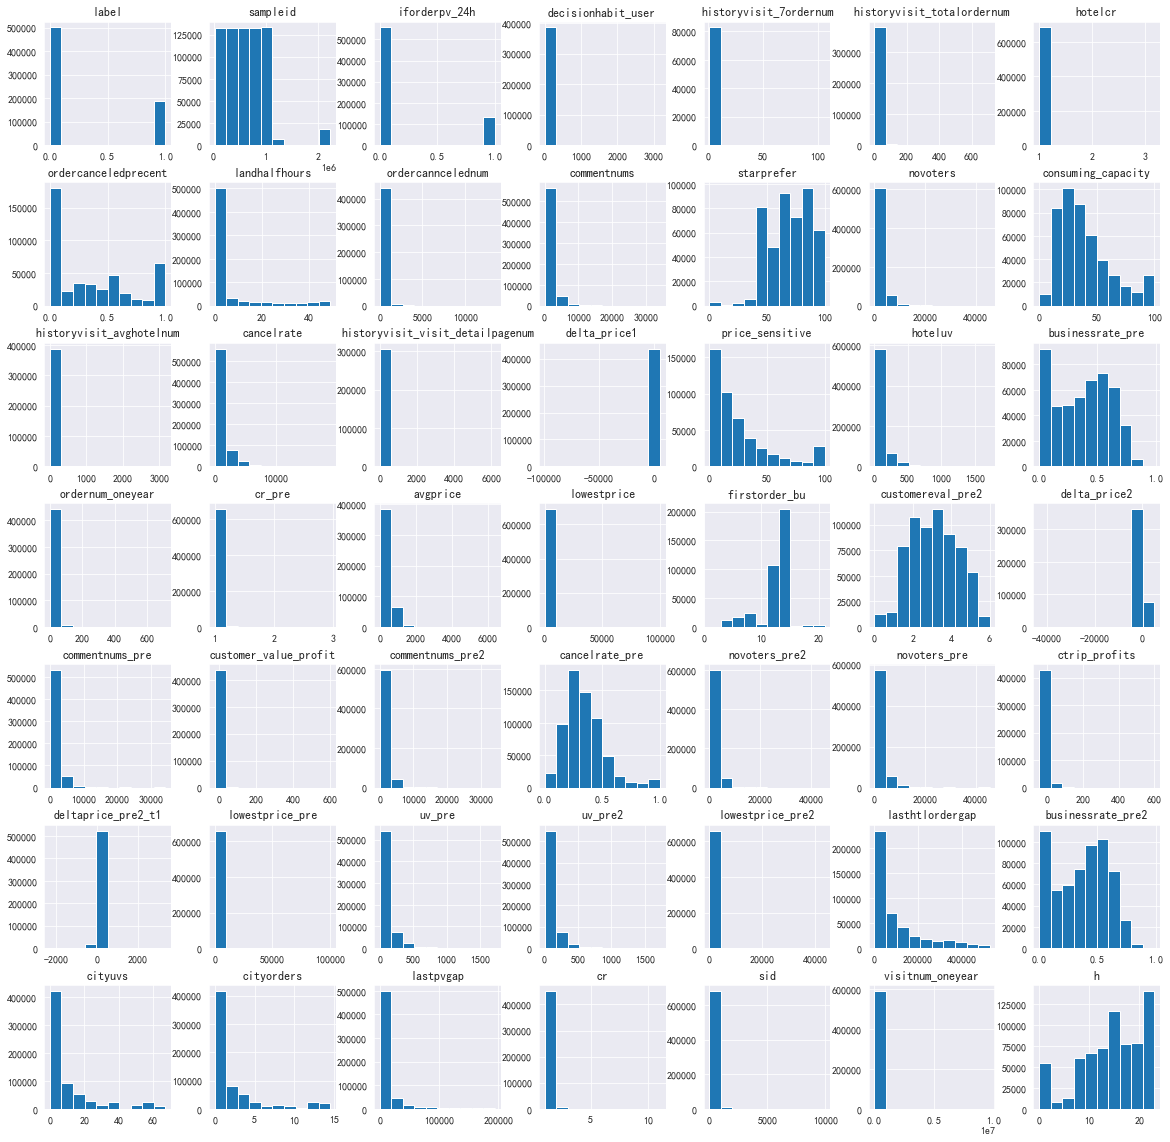

In [12]:
df.hist(figsize=(20,20))

In [13]:
cdf = df.copy()

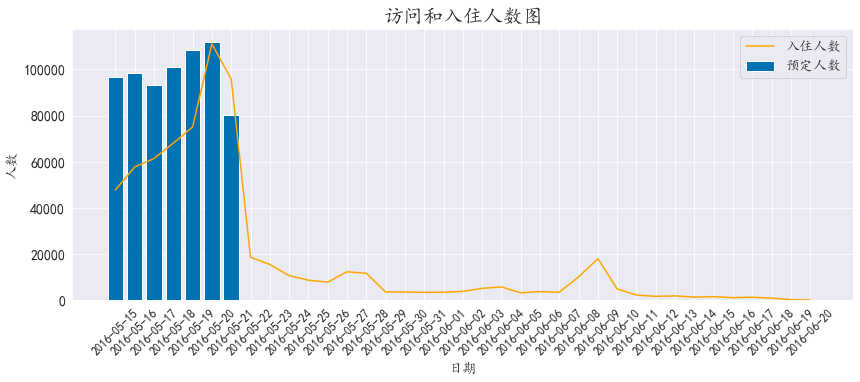

In [14]:
# 构建访问时间和到达时间的表格
cdf_d = cdf.d.value_counts().to_frame().reset_index()
cdf_arrival = cdf.arrival.value_counts().to_frame().reset_index()
time_table = cdf_d.merge(cdf_arrival, how='outer', on='index')
time_table.fillna(0,inplace = True)
time_table.set_index('index',inplace=True)
time_table.sort_index(inplace=True)
# 获取字段
x = time_table.index
y1 = time_table.arrival
y2 = time_table.d
# 画图
plt.figure(figsize=(14,5))
plt.style.use('seaborn-colorblind')
plt.plot(x, y1, c='orange', label='入住人数')
plt.bar(x, y2, align='center', label='预定人数')
plt.title('访问和入住人数图',fontsize=20)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('日期',fontsize=14)
plt.ylabel('人数', fontsize=14)
plt.legend(fontsize=14)
#由图看出，520前预定人数和入住人数逐渐攀升，在520当天达到峰值，过了521，入住人数断崖式下降，
#随后酒店入住人数较为稳定，后面的两个下波峰是由于周末的原因。

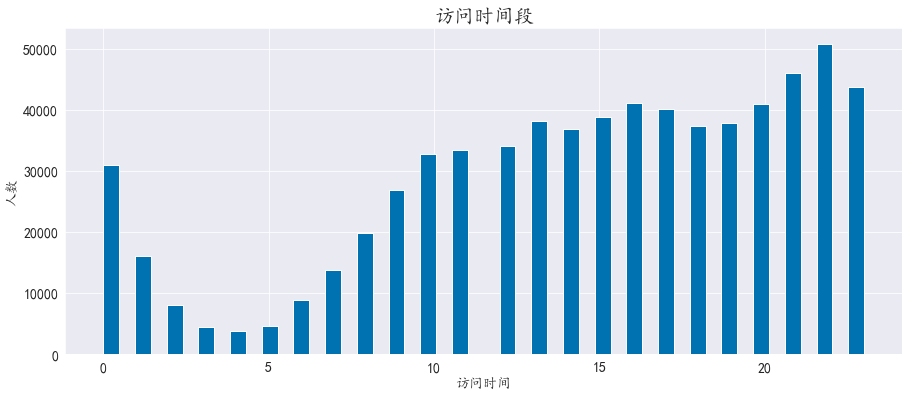

In [15]:
#访问时间段
plt.figure(figsize=(15,6))
plt.hist(cdf.h.dropna(), bins=48, align='mid')  # 由于是24h，所以分箱48，使得中间有间隔。
plt.title('访问时间段',fontsize=20);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('访问时间',fontsize=14); 
plt.ylabel('人数',fontsize=14);

Text(0.5, 1.0, '客户价值')

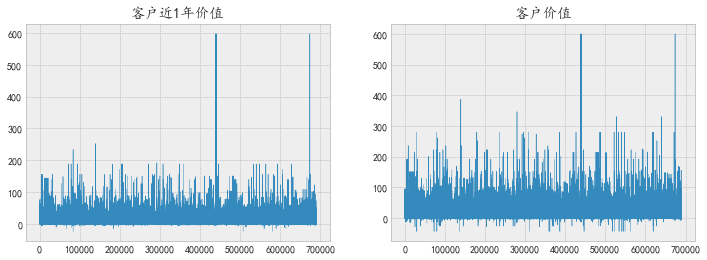

In [16]:
plt.figure(figsize=(12, 4))
plt.style.use('bmh')

# 看看customer_value_profit 和 ctrip_profits 两者分布
plt.subplot(121)
plt.plot(cdf.index, cdf.customer_value_profit,linewidth=0.5)
plt.title('客户近1年价值')

plt.subplot(122)
plt.plot(df.index,df.ctrip_profits,linewidth=0.5)
plt.title('客户价值')


Text(0.5, 1.0, '消费能力指数图')

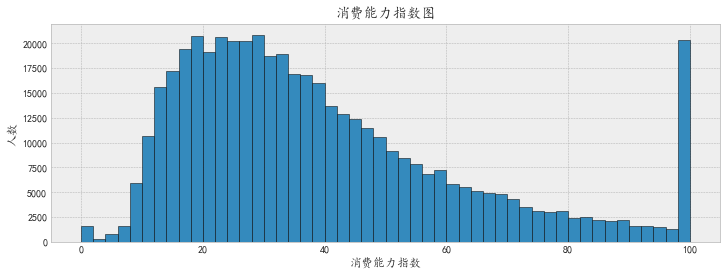

In [17]:
plt.figure(figsize=(12, 4))

plt.hist(df.consuming_capacity,bins=50,edgecolor='k')
plt.xlabel('消费能力指数')
plt.ylabel('人数')
plt.title('消费能力指数图')

Text(0.5, 1.0, '价格敏感指数分布')

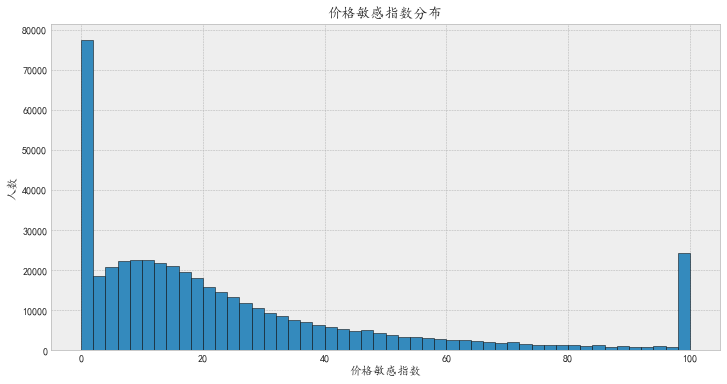

In [18]:
plt.figure(figsize=(12, 6))
plt.hist(df['price_sensitive'].dropna(),bins = 50, edgecolor = 'k')
plt.xlabel('价格敏感指数') 
plt.ylabel('人数') 
plt.title('价格敏感指数分布')

Text(0.5, 1.0, '酒店价格偏好')

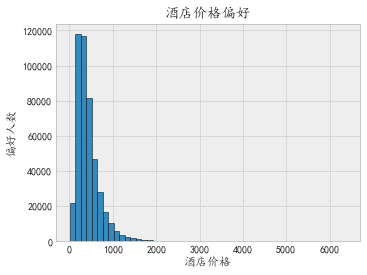

In [19]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.hist(df.avgprice.dropna(),bins=50,edgecolor = 'k')
plt.xlabel('酒店价格')
plt.ylabel('偏好人数')
plt.title('酒店价格偏好')

Text(0.5, 1.0, '2000元以内酒店偏好')

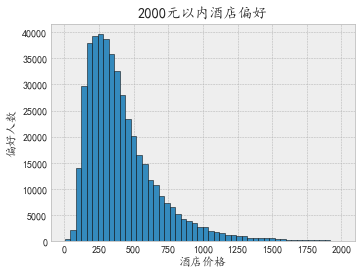

In [20]:
# 由于酒店价格主要在2000以内，因此针对这个区间进行进一步可视化查看
plt.figure(figsize=(12, 4))
plt.subplot(122)
plt.hist(df[df.avgprice<2000]['avgprice'].dropna(), bins = 50, edgecolor = 'k')
plt.xlabel('酒店价格')
plt.ylabel('偏好人数')
plt.title('2000元以内酒店偏好')

Text(0.5, 1.0, '酒店星级偏好')

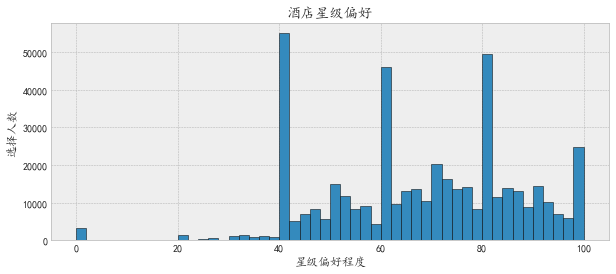

In [21]:
plt.figure(figsize=(10, 4))
plt.hist(df.starprefer.dropna(), bins = 50, edgecolor = 'k')
plt.xlabel('星级偏好程度')
plt.ylabel('选择人数')
plt.title('酒店星级偏好')

Text(0.5, 1.0, '订单取消率')

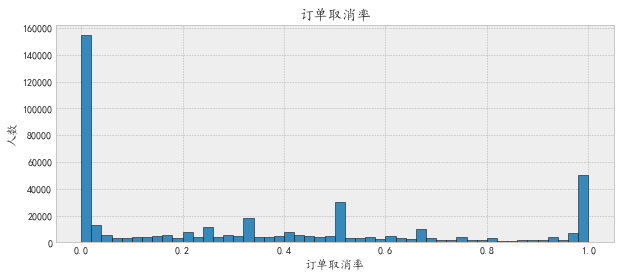

In [22]:
plt.figure(figsize=(10, 4))
plt.hist(df.ordercanceledprecent.dropna(),bins=50,edgecolor = 'k')
plt.xlabel('订单取消率')
plt.ylabel('人数')
plt.title('订单取消率')

Text(0.5, 1.0, '用户年订单数100内的分布')

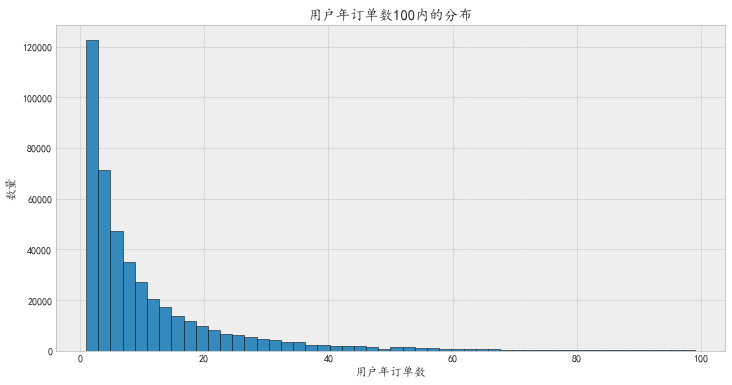

In [23]:
plt.figure(figsize=(12, 6))
plt.hist(df[df["ordernum_oneyear"]<100]["ordernum_oneyear"].dropna(),bins = 50, edgecolor = 'k')
plt.xlabel('用户年订单数') 
plt.ylabel('数量') 
plt.title('用户年订单数100内的分布')

In [24]:
# 新老客户，可以由sid来判断。流失与否，用label来判断
# 计算新老用户流失率
s_table = cdf[['label','sid']]
s_table['sid'] = np.where(s_table['sid']==1, 1, 0)  # 将sid处理为0和1两种情况，对应新客户和老客户
s_table['flag'] = 1
s = s_table.groupby('sid').sum().reset_index()  # 按照新老用户区分，label是流失和没流失的人数，flag是新、老用户数
s['rate'] = (s['flag'] - s['label']) / s['flag']  # 新老用户流失率
s

,sid,label,flag,rate
0,0,181428,651444,0.721499
1,1,7929,38501,0.794057


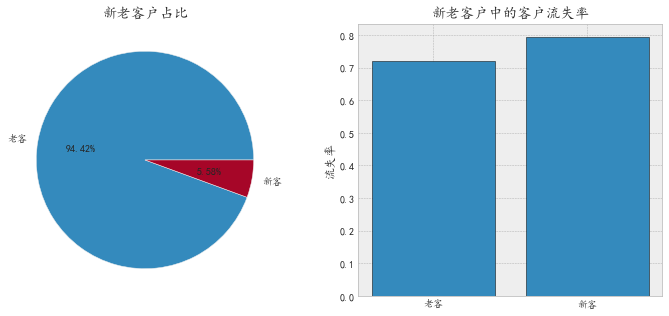

In [25]:
# 画图
# 新老客户占比
plt.figure(figsize=(12, 5))
plt.subplot(121)
percent=[s['flag'][0]/s['flag'].sum(), s['flag'][1]/s['flag'].sum()]
# color=['steelblue','lightskyblue']
label=['老客','新客']
plt.pie(percent,autopct='%.2f%%',labels=label)
plt.title('新老客户占比')

# 流失率
plt.subplot(122)
plt.bar(s.sid, s.rate,align='center',tick_label=label,edgecolor = 'k')
plt.ylabel('流失率')
plt.title('新老客户中的客户流失率');

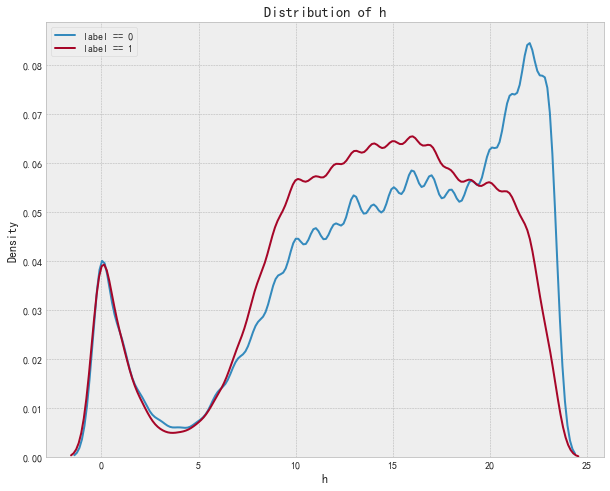

In [26]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(cdf.loc[cdf['label'] == 0, 'h'].dropna(), label = 'label == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(cdf.loc[cdf['label'] == 1, 'h'].dropna(), label = 'label == 1')
plt.legend()
# Labeling of plot
plt.xlabel('h'); plt.ylabel('Density'); plt.title('Distribution of h');

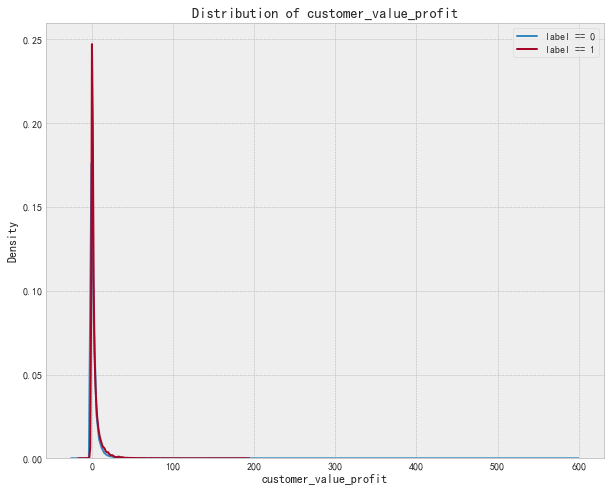

In [27]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(cdf.loc[cdf['label'] == 0, 'customer_value_profit'].dropna(), label = 'label == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(cdf.loc[cdf['label'] == 1, 'customer_value_profit'].dropna(), label = 'label == 1')
plt.legend()
# Labeling of plot
plt.xlabel('customer_value_profit'); plt.ylabel('Density'); plt.title('Distribution of customer_value_profit');

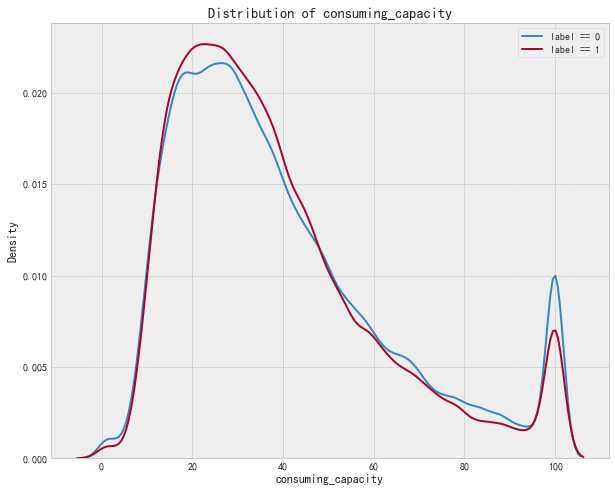

In [28]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(cdf.loc[cdf['label'] == 0, 'consuming_capacity'].dropna(), label = 'label == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(cdf.loc[cdf['label'] == 1, 'consuming_capacity'].dropna(), label = 'label == 1')
plt.legend()
# Labeling of plot
plt.xlabel('consuming_capacity'); plt.ylabel('Density'); plt.title('Distribution of consuming_capacity');

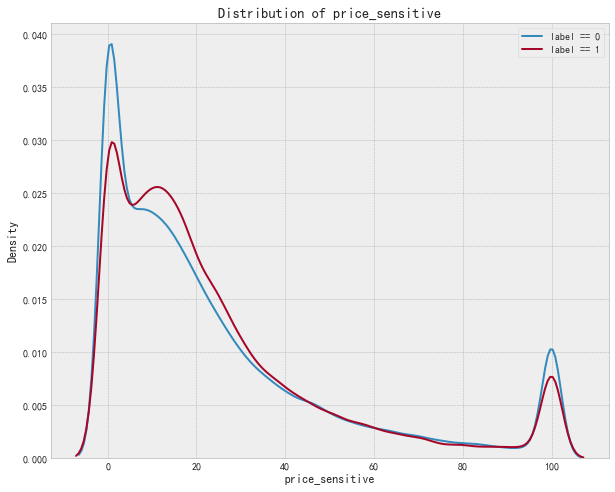

In [29]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(cdf.loc[cdf['label'] == 0, 'price_sensitive'].dropna(), label = 'label == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(cdf.loc[cdf['label'] == 1, 'price_sensitive'].dropna(), label = 'label == 1')
plt.legend()
# Labeling of plot
plt.xlabel('price_sensitive'); plt.ylabel('Density'); plt.title('Distribution of price_sensitive');

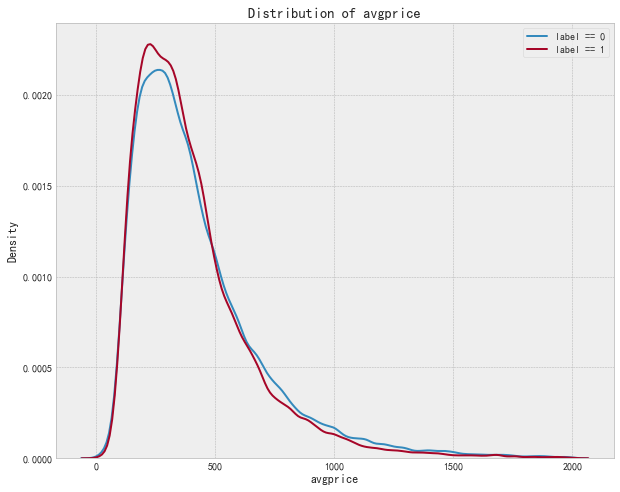

In [30]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(cdf[cdf.avgprice<2000].loc[cdf['label'] == 0, 'avgprice'].dropna(), label = 'label == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(cdf[cdf.avgprice<2000].loc[cdf['label'] == 1, 'avgprice'].dropna(), label = 'label == 1')
plt.legend()
# Labeling of plot
plt.xlabel('avgprice'); plt.ylabel('Density'); plt.title('Distribution of avgprice');

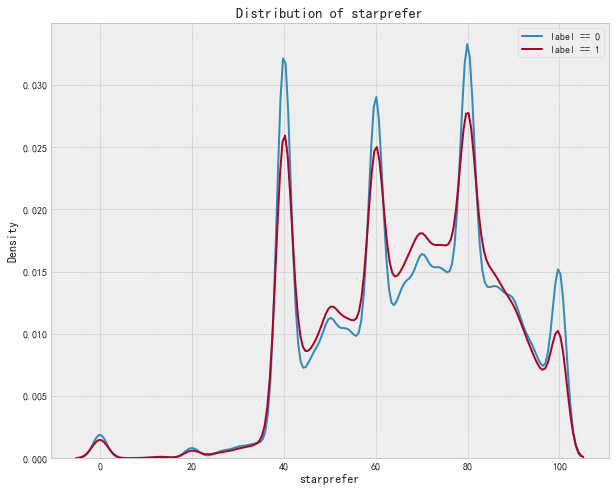

In [31]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(cdf.loc[cdf['label'] == 0, 'starprefer'].dropna(), label = 'label == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(cdf.loc[cdf['label'] == 1, 'starprefer'].dropna(), label = 'label == 1')
plt.legend()
# Labeling of plot
plt.xlabel('starprefer'); plt.ylabel('Density'); plt.title('Distribution of starprefer');

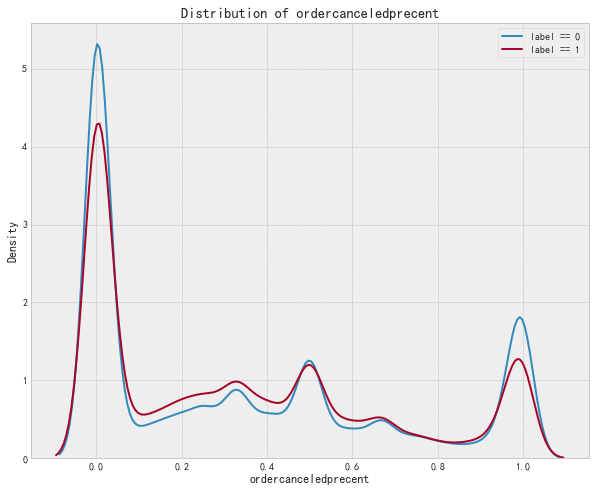

In [32]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(cdf.loc[cdf['label'] == 0, 'ordercanceledprecent'].dropna(), label = 'label == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(cdf.loc[cdf['label'] == 1, 'ordercanceledprecent'].dropna(), label = 'label == 1')
plt.legend()
# Labeling of plot
plt.xlabel('ordercanceledprecent'); plt.ylabel('Density'); plt.title('Distribution of ordercanceledprecent');

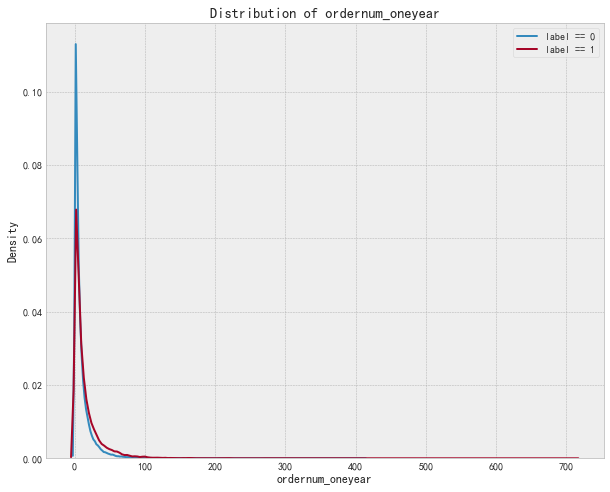

In [33]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(cdf.loc[cdf['label'] == 0, 'ordernum_oneyear'].dropna(), label = 'label == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(cdf.loc[cdf['label'] == 1, 'ordernum_oneyear'].dropna(), label = 'label == 1')
plt.legend()
# Labeling of plot
plt.xlabel('ordernum_oneyear'); plt.ylabel('Density'); plt.title('Distribution of ordernum_oneyear');

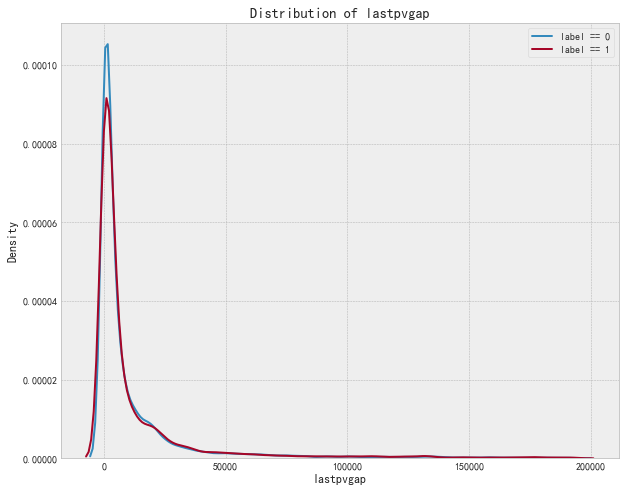

In [34]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(cdf.loc[cdf['label'] == 0, 'lastpvgap'].dropna(), label = 'label == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(cdf.loc[cdf['label'] == 1, 'lastpvgap'].dropna(), label = 'label == 1')
plt.legend()
# Labeling of plot
plt.xlabel('lastpvgap'); plt.ylabel('Density'); plt.title('Distribution of lastpvgap');

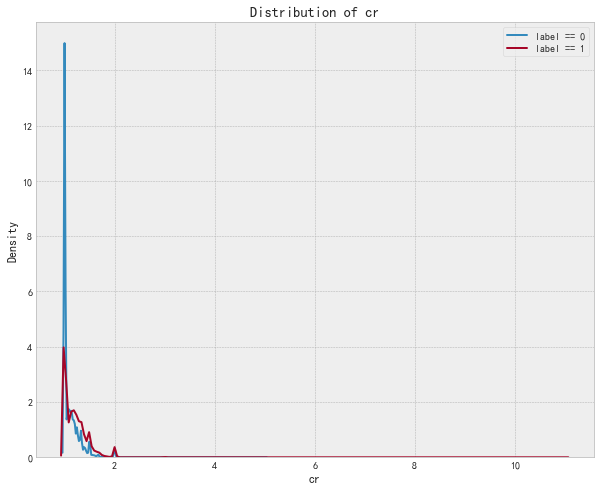

In [35]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(cdf.loc[cdf['label'] == 0, 'cr'].dropna(), label = 'label == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(cdf.loc[cdf['label'] == 1, 'cr'].dropna(), label = 'label == 1')
plt.legend()
# Labeling of plot
plt.xlabel('cr'); plt.ylabel('Density'); plt.title('Distribution of cr');

In [36]:
rawdf = df.copy()

In [37]:
print(rawdf.shape)
rawdf.drop(columns = ['sampleid', 'firstorder_bu'],inplace = True)
print(rawdf.shape)
rawdf.drop_duplicates(inplace = True)
print(rawdf.shape)

(689945, 51)
(689945, 49)
(684406, 49)


In [38]:
# 将两个日期变量由字符串转换为日期格式
rawdf['arrival'] = pd.to_datetime(rawdf['arrival'] )
rawdf['d'] = pd.to_datetime(rawdf['d'])
# 生成提前预定天数（衍生变量）（到达日期-访问日期间隔）（看提前多少天订）
rawdf['day_advanced'] = (rawdf['arrival']-rawdf['d']).dt.days
# 时间格式
rawdf['d'] = pd.to_datetime(df['d'], format = '%Y-%m-%d')
rawdf['arrival'] = pd.to_datetime(df['arrival'], format='%Y-%m-%d')
# 用户周几入住
rawdf['arrival_weekday'] = rawdf['arrival'].map(lambda x:x.weekday())
def is_weekend(a):
    if int(a) in [0,1,2,3,4]:
        return 0 # 0代表是工作日
    else:
        return 1 # 1代表是周末

rawdf['is_arrival_weekend'] = rawdf['arrival_weekday'].map(lambda x: is_weekend(x))
rawdf.drop(labels=['d','arrival'], axis=1, inplace=True)


In [39]:
rawdf.head()

,label,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,commentnums,starprefer,novoters,consuming_capacity,historyvisit_avghotelnum,cancelrate,historyvisit_visit_detailpagenum,delta_price1,price_sensitive,hoteluv,businessrate_pre,ordernum_oneyear,cr_pre,avgprice,lowestprice,customereval_pre2,delta_price2,commentnums_pre,customer_value_profit,commentnums_pre2,cancelrate_pre,novoters_pre2,novoters_pre,ctrip_profits,deltaprice_pre2_t1,lowestprice_pre,uv_pre,uv_pre2,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,day_advanced,arrival_weekday,is_arrival_weekend
0,0,0,NaN,NaN,NaN,1.04,NaN,22.0,NaN,1089.0,NaN,1933.0,NaN,NaN,1261.0,NaN,NaN,NaN,102.607,0.25,NaN,1.03,NaN,49.0,3.2,NaN,724.0,NaN,844.0,0.03,1335.0,1249.0,NaN,29.0,46.0,58.027,74.956,615.0,NaN,0.29,12.880,3.147,NaN,NaN,7,NaN,12,0,2,0
1,1,0,NaN,NaN,NaN,1.06,NaN,0.0,NaN,5612.0,NaN,6852.0,NaN,NaN,3205.0,NaN,NaN,NaN,278.373,0.51,NaN,1.07,NaN,619.0,4.9,NaN,5610.0,NaN,3789.0,0.21,5430.0,7829.0,NaN,-56.0,111.0,249.347,224.920,513.0,NaN,0.53,17.933,4.913,NaN,NaN,33,NaN,14,0,2,0
2,0,0,NaN,NaN,NaN,1.05,NaN,3.0,NaN,256.0,NaN,367.0,NaN,NaN,194.0,NaN,NaN,NaN,16.133,0.61,NaN,1.12,NaN,312.0,3.9,NaN,4721.0,NaN,4341.0,0.52,5353.0,7324.0,NaN,8.0,413.0,133.093,112.063,382.0,NaN,0.60,3.993,0.760,NaN,NaN,10,NaN,19,1,3,0
3,0,0,NaN,NaN,NaN,1.01,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,1.780,NaN,NaN,1.01,NaN,198.0,2.1,NaN,41.0,NaN,529.0,0.53,1004.0,81.0,NaN,-7.0,188.0,4.600,58.844,203.0,NaN,0.18,3.220,0.660,NaN,NaN,8,NaN,16,0,2,0
4,1,0,NaN,NaN,NaN,1.00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.073,NaN,NaN,1.03,NaN,NaN,1.5,NaN,NaN,NaN,NaN,1.00,1.0,NaN,NaN,-5.0,NaN,0.213,0.157,84.0,NaN,NaN,0.013,NaN,NaN,NaN,1,NaN,21,1,3,0


In [40]:
filter_one=['customer_value_profit','ctrip_profits']
filter_two=['delta_price1','delta_price2','lowestprice']

for f in filter_one:
    rawdf.loc[rawdf[f]<0, f] = 0

for f in filter_two:
    rawdf.loc[rawdf[f]<0, f] = rawdf[f].median()
    
rawdf[['customer_value_profit','ctrip_profits','delta_price1','delta_price2','lowestprice']].describe([0.01, 0.25, 0.5, 0.75, 0.99],include = 'all').T


,count,mean,std,min,1%,25%,50%,75%,99%,max
customer_value_profit,438351.0,3.053405,6.620095,0.0,0.0,0.269,0.991,3.139,28.451,598.064
ctrip_profits,444380.0,4.231360,9.298553,0.0,0.0,0.340,1.347,4.320,40.773,600.820
delta_price1,436364.0,185.570443,220.462962,0.0,4.0,81.000,81.000,226.000,1081.000,5398.000
delta_price2,436965.0,165.940583,208.582383,0.0,4.0,69.000,69.000,198.000,1018.000,5114.000
lowestprice,682514.0,318.623854,577.351226,1.0,37.0,116.000,200.000,380.000,1824.000,100000.000


In [41]:
for i in rawdf.columns:
    value_1_percent =  np.percentile(rawdf[i], 1)  # # 1%的值
    value_99_percent = np.percentile(rawdf[i], 99) # 99%的值
    
    rawdf.loc[rawdf[i]<value_1_percent, i] = value_1_percent
    rawdf.loc[rawdf[i]>value_99_percent, i] = value_99_percent

# 查看表现
rawdf.skew().sort_values()

h                                   -0.666982
starprefer                          -0.361818
arrival_weekday                     -0.186895
businessrate_pre2                   -0.108628
businessrate_pre                    -0.042588
customereval_pre2                   -0.032924
ordercanceledprecent                 0.655864
is_arrival_weekend                   0.986184
label                                1.002219
consuming_capacity                   1.029724
cancelrate_pre                       1.261816
deltaprice_pre2_t1                   1.455136
price_sensitive                      1.504156
lasthtlordergap                      1.536395
iforderpv_24h                        1.564425
cr_pre                               1.778698
cityuvs                              2.033030
day_advanced                         2.074114
cityorders                           2.115288
landhalfhours                        2.196870
sid                                  2.679949
avgprice                          

In [42]:
# 常用缺失值处理方法

#     不处理（针对类似 XGBoost 等树模型）；
#     删除（缺失数据太多）；
#     插值补全，包括均值/中位数/众数/建模预测/多重插补/压缩感知补全/矩阵补全等；
#     分箱，缺失值一个箱；

In [43]:
print('原来数据维度是:{}'.format(rawdf.shape))

# 定义删除空值行列的函数
def nan_drop(df,axi, rate=0.5):
    # rawdf.shape[1-0]是比如，如果要删除的是行，则看列的数量，然后*比率，即改行有多少列是缺失的
    # 反过来，如果要删除的是列，则看行的数量*比率，即该列有多少行缺失，从而删除
    # thresh是至少有多少存在则保留，否则删除
    df.dropna(axis=axi, how='any', thresh=df.shape[1-axi]*rate, inplace=True)

# 删除缺失值比例大于80%的行和列
nan_drop(rawdf, axi=0, rate=0.2)
nan_drop(rawdf, axi=1, rate=0.2)

print('删除缺失率较多的字段后的维度是:{}'.format(rawdf.shape))

原来数据维度是:(684406, 50)
删除缺失率较多的字段后的维度是:(684401, 49)


In [44]:
# 查看含有缺数的数据的偏态
rawdf.skew()[rawdf.isnull().mean(0)>0].sort_values()  # 查看含有缺数的数据的偏态
#对于缺失值小于80%的字段，结合数据分布形态填充。服从正态分布的使用均值填充，呈偏态分布的，使用中位数填充。

starprefer                          -0.361818
businessrate_pre2                   -0.108628
businessrate_pre                    -0.042588
customereval_pre2                   -0.032924
ordercanceledprecent                 0.655864
consuming_capacity                   1.029724
cancelrate_pre                       1.261816
deltaprice_pre2_t1                   1.455136
price_sensitive                      1.504156
lasthtlordergap                      1.536395
cr_pre                               1.778698
cityuvs                              2.033030
cityorders                           2.115288
landhalfhours                        2.196870
avgprice                             2.698799
hotelcr                              2.706416
cancelrate                           3.707172
lastpvgap                            3.862592
delta_price1                         3.906158
uv_pre2                              3.952352
delta_price2                         4.184307
uv_pre                            

In [45]:
# 正态分布字段用均值填充
def nan_fill(df):
    filter_mean = ["businessrate_pre2","cancelrate_pre",
      "businessrate_pre",'starprefer','cancelrate_pre',
      'customereval_pre2','ordercanceledprecent',
      'consuming_capacity']
    for col in df.columns:
        if col in filter_mean:
            df[col] = df[col].fillna(df[col].mean())
        else:
            df[col] = df[col].fillna(df[col].median())
    return df

In [46]:
rawdf = nan_fill(rawdf)
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684401 entries, 0 to 689944
Data columns (total 49 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   label                             684401 non-null  float64
 1   iforderpv_24h                     684401 non-null  float64
 2   decisionhabit_user                684401 non-null  float64
 3   historyvisit_totalordernum        684401 non-null  float64
 4   hotelcr                           684401 non-null  float64
 5   ordercanceledprecent              684401 non-null  float64
 6   landhalfhours                     684401 non-null  float64
 7   ordercanncelednum                 684401 non-null  float64
 8   commentnums                       684401 non-null  float64
 9   starprefer                        684401 non-null  float64
 10  novoters                          684401 non-null  float64
 11  consuming_capacity                684401 non-null  f

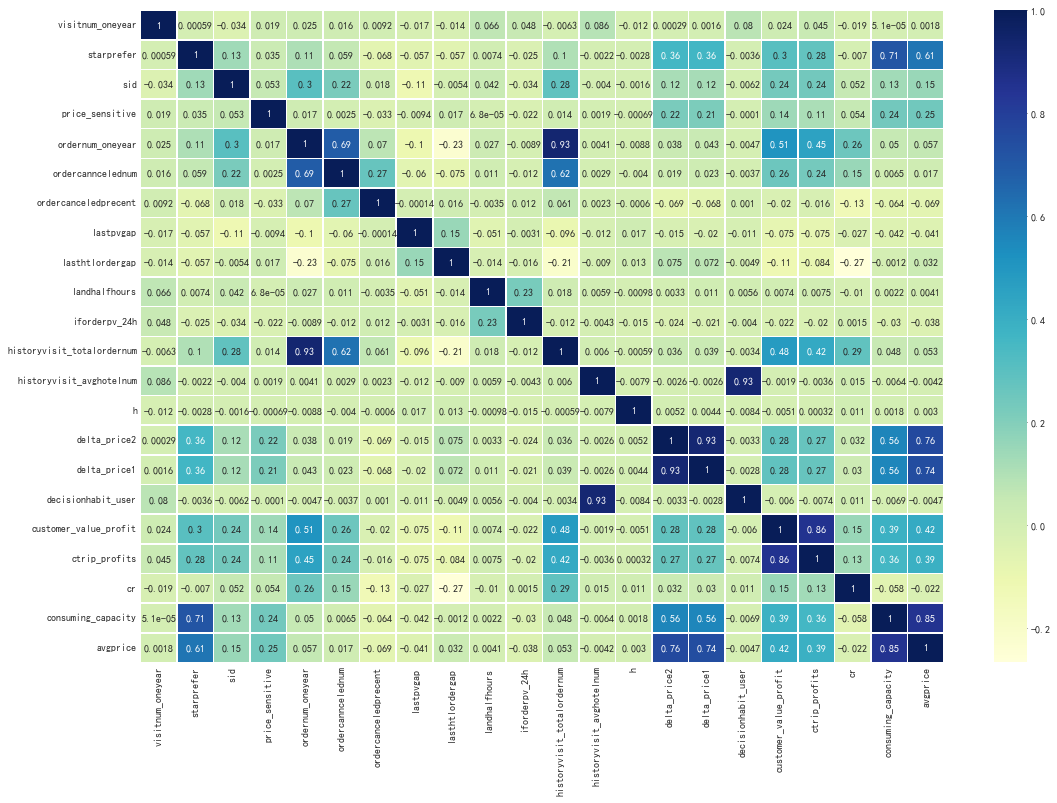

In [47]:
# 用户特征提取
user_features=['visitnum_oneyear','starprefer','sid','price_sensitive','ordernum_oneyear','ordercanncelednum','ordercanceledprecent','lastpvgap',
               'lasthtlordergap','landhalfhours','iforderpv_24h','historyvisit_totalordernum','historyvisit_avghotelnum','h',
               'delta_price2','delta_price1','decisionhabit_user','customer_value_profit','ctrip_profits','cr','consuming_capacity','avgprice']
corr_mat = rawdf[user_features].corr()
fig,ax = plt.subplots(figsize = (18,12))
sns.heatmap(corr_mat,xticklabels=True, yticklabels=True, square=False, linewidths=.5, annot=True, cmap="YlGnBu")
plt.show()

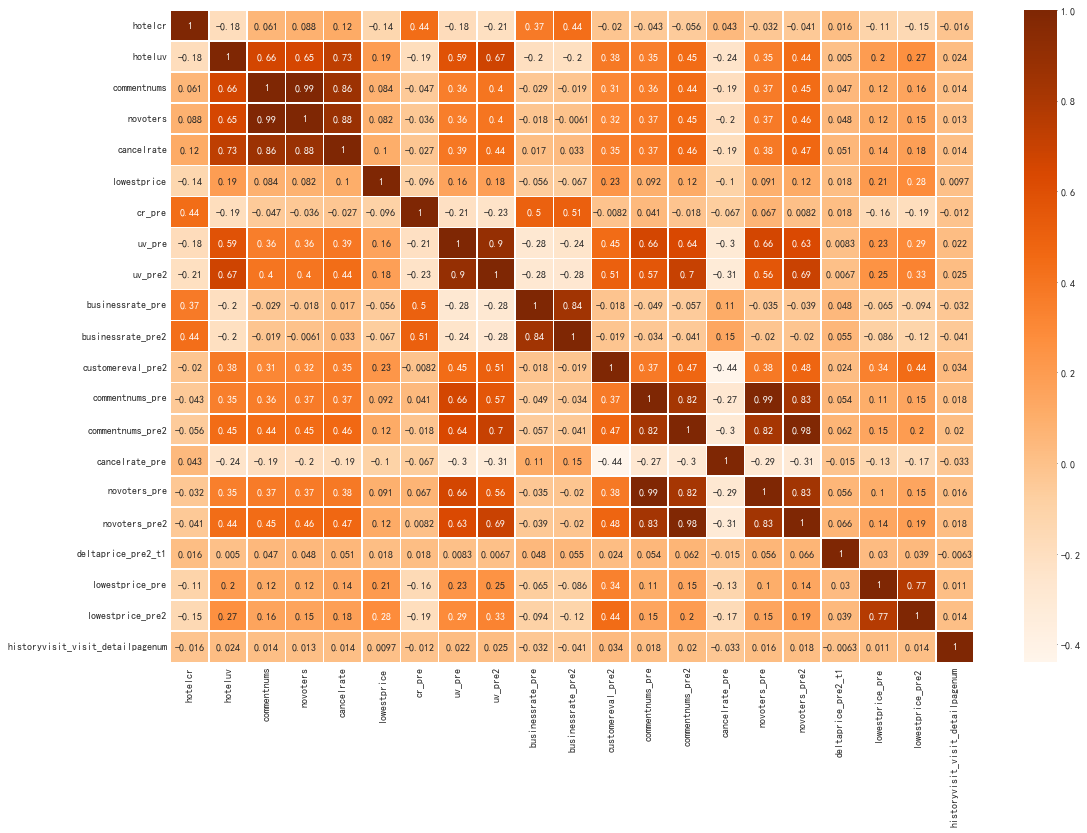

In [48]:
# 酒店信息特征相关性分析

# 酒店特征
hotel_features=['hotelcr','hoteluv','commentnums','novoters','cancelrate','lowestprice','cr_pre','uv_pre','uv_pre2','businessrate_pre',
                'businessrate_pre2','customereval_pre2','commentnums_pre','commentnums_pre2','cancelrate_pre','novoters_pre','novoters_pre2',
                'deltaprice_pre2_t1','lowestprice_pre','lowestprice_pre2','historyvisit_visit_detailpagenum']

# 生成酒店特征的相关性矩阵
corr_mat1 = rawdf[hotel_features].corr()

# 画图
fig, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(corr_mat1, xticklabels=True, yticklabels=True, square=False, linewidths=.5, annot=True, cmap='Oranges')
plt.show()


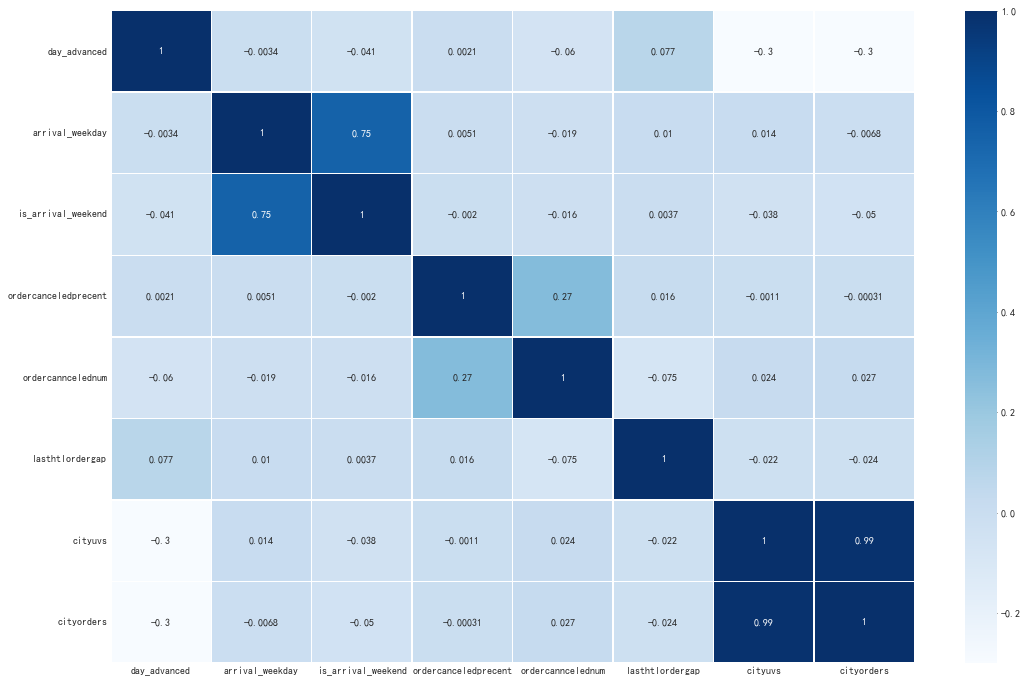

In [49]:
order_features = [ 'day_advanced', 'arrival_weekday', 'is_arrival_weekend' ,'ordercanceledprecent' ,'ordercanncelednum', 
         'lasthtlordergap', 'cityuvs', 'cityorders']

order_corr=rawdf[order_features].corr()   

# 画图
fig, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(order_corr, xticklabels=True, yticklabels=True, square=False, linewidths=.5, annot=True, cmap='Blues')
plt.show()


In [50]:
#PCA降维
c_value=['customer_value_profit','ctrip_profits']                   # 用户价值维度
consume_level=['avgprice','consuming_capacity']                     # 用户消费水平
price_prefer=['delta_price1','delta_price2']                        # 用户偏好价格
ordernum_1_year = ['ordernum_oneyear', 'historyvisit_totalordernum']# 用户一年历史订单数

hotel_hot=['commentnums','novoters']                                # 酒店热度
hotel_hot_pre=['commentnums_pre','novoters_pre']                    # 24h内浏览次数最多的酒店热度
hotel_hot_pre2=['commentnums_pre2','novoters_pre2']                 # 24h内酒浏览酒店的平均热度
hotel_uv_pre = ['uv_pre', 'uv_pre2']                                # 24小时历史浏览次数最多的酒店的独立访客数

order_cityuvs_orders = ['cityorders','cityuvs']                     # 昨日访问当前城市同入住日期的app uv数和订单数


In [51]:
from sklearn.decomposition import PCA

pca=PCA(n_components=1)
rawdf['c_value']=pca.fit_transform(rawdf[c_value])
rawdf['consume_level']=pca.fit_transform(rawdf[consume_level])
rawdf['price_prefer']=pca.fit_transform(rawdf[price_prefer])
rawdf['ordernum_1_year'] = pca.fit_transform(rawdf[ordernum_1_year])
rawdf['hotel_hot']=pca.fit_transform(rawdf[hotel_hot])
rawdf['hotel_hot_pre']=pca.fit_transform(rawdf[hotel_hot_pre])
rawdf['hotel_hot_pre2']=pca.fit_transform(rawdf[hotel_hot_pre2])
rawdf['hotel_uv_pre']=pca.fit_transform(rawdf[hotel_uv_pre])
rawdf['order_cityuvs_orders']=pca.fit_transform(rawdf[order_cityuvs_orders])

rawdf.drop(c_value,axis=1,inplace=True)
rawdf.drop(consume_level,axis=1,inplace=True)
rawdf.drop(price_prefer,axis=1,inplace=True)
rawdf.drop(ordernum_1_year,axis=1,inplace=True)
rawdf.drop(hotel_hot,axis=1,inplace=True)
rawdf.drop(hotel_hot_pre,axis=1,inplace=True)
rawdf.drop(hotel_hot_pre2,axis=1,inplace=True)
rawdf.drop(hotel_uv_pre,axis=1,inplace=True)
rawdf.drop(order_cityuvs_orders,axis=1,inplace=True)


print('PCA降维后维度是:{}'.format(rawdf.shape))  


PCA降维后维度是:(684401, 40)


In [52]:
visit_num=['decisionhabit_user','historyvisit_avghotelnum']        #用户访问数
pca=PCA(n_components=1)
rawdf['visit_num']=pca.fit_transform(rawdf[visit_num])
rawdf.drop(visit_num,axis=1,inplace=True)
print('PCA降维后维度是:{}'.format(rawdf.shape)) 

PCA降维后维度是:(684401, 39)


In [53]:
#数据标准归一化
from sklearn.preprocessing import StandardScaler
y = rawdf['label']
x = rawdf.drop('label',axis = 1)
scaler = StandardScaler()
scaler.fit(x)
X = scaler.transform(x)

In [54]:
#建模预测
from sklearn.model_selection import train_test_split, GridSearchCV
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=420)

In [55]:
from sklearn.metrics import classification_report
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [56]:
import xgboost as xgb

# 读取训练集和测试集
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test)

# 设置xgboost建模参数
params={'booster':'gbtree','objective': 'binary:logistic','eval_metric': 'auc',
    'max_depth':8,'gamma':0,'lambda':2,'subsample':0.7,'colsample_bytree':0.8,
    'min_child_weight':3,'eta': 0.2,'nthread':8,'silent':1}

# 训练模型
watchlist = [(dtrain,'train')]
bst=xgb.train(params,dtrain,num_boost_round=500,evals=watchlist)

#  输入预测为正确的概率
y_prob = bst.predict(dtest)
# 设置阈值为0.5，得到测试集的测试结果
y_pred = (y_prob >= 0.5)*1


# 获取真阳率、伪阳率、阈值
fpr_xgb,tpr_xgb,threshold_xgb = metrics.roc_curve(y_test,y_prob)   
auc_xgb = metrics.auc(fpr_xgb,tpr_xgb)    # AUC得分
score_xgb = metrics.accuracy_score(y_test,y_pred)    # 模型准确率
print('模型准确率为:{0},AUC得分为:{1}'.format(score_xgb,auc_xgb))
print('============================================================')
print(classification_report(y_test,y_pred,labels=None,target_names=None,sample_weight=None, digits=2))



[16:56:52] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.71273
[1]	train-auc:0.72406
[2]	train-auc:0.73674
[3]	train-auc:0.74337
[4]	train-auc:0.75330
[5]	train-auc:0.75762
[6]	train-auc:0.76089
[7]	train-auc:0.76337
[8]	train-auc:0.76723
[9]	train-auc:0.77021
[10]	train-auc:0.77313
[11]	train-auc:0.77546
[12]	train-auc:0.77783
[13]	train-auc:0.78068
[14]	train-auc:0.78266
[15]	train-auc:0.78577
[16]	train-auc:0.78855
[17]	train-auc:0.79062
[18]	train-auc:0.79333
[19]	train-auc:0.79525
[20]	train-auc:0.79707
[21]	train-auc:0.79783
[22]	train-auc:0.79928
[23]	train-auc:0.80098
[24]	train-auc:0.80255
[25]	train-auc:0.803

[329]	train-auc:0.95849
[330]	train-auc:0.95859
[331]	train-auc:0.95884
[332]	train-auc:0.95903
[333]	train-auc:0.95925
[334]	train-auc:0.95959
[335]	train-auc:0.95965
[336]	train-auc:0.95986
[337]	train-auc:0.96000
[338]	train-auc:0.96024
[339]	train-auc:0.96043
[340]	train-auc:0.96052
[341]	train-auc:0.96067
[342]	train-auc:0.96081
[343]	train-auc:0.96086
[344]	train-auc:0.96105
[345]	train-auc:0.96113
[346]	train-auc:0.96130
[347]	train-auc:0.96142
[348]	train-auc:0.96153
[349]	train-auc:0.96165
[350]	train-auc:0.96192
[351]	train-auc:0.96198
[352]	train-auc:0.96212
[353]	train-auc:0.96226
[354]	train-auc:0.96247
[355]	train-auc:0.96262
[356]	train-auc:0.96276
[357]	train-auc:0.96291
[358]	train-auc:0.96309
[359]	train-auc:0.96320
[360]	train-auc:0.96341
[361]	train-auc:0.96352
[362]	train-auc:0.96365
[363]	train-auc:0.96371
[364]	train-auc:0.96385
[365]	train-auc:0.96397
[366]	train-auc:0.96404
[367]	train-auc:0.96421
[368]	train-auc:0.96441
[369]	train-auc:0.96454
[370]	train-auc:

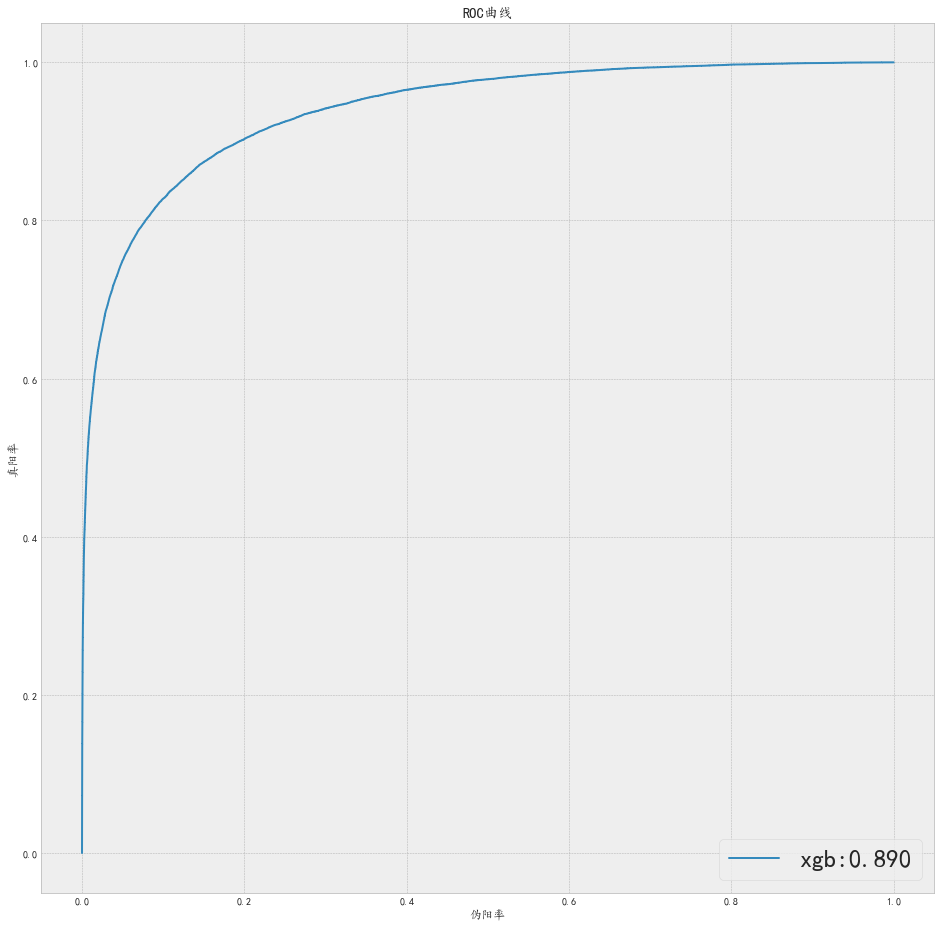

In [57]:
plt.style.use('bmh')
plt.figure(figsize=(16,16))

plt.plot(fpr_xgb,tpr_xgb,label='xgb:{0:.3f}'.format(score_xgb))         # XGBoost

plt.legend(loc='lower right', prop={'size':25})
plt.xlabel('伪阳率')
plt.ylabel('真阳率')
plt.title('ROC曲线')
plt.savefig('./模型比较ROC曲线图.jpg',dpi=400, bbox_inches='tight')
plt.show()


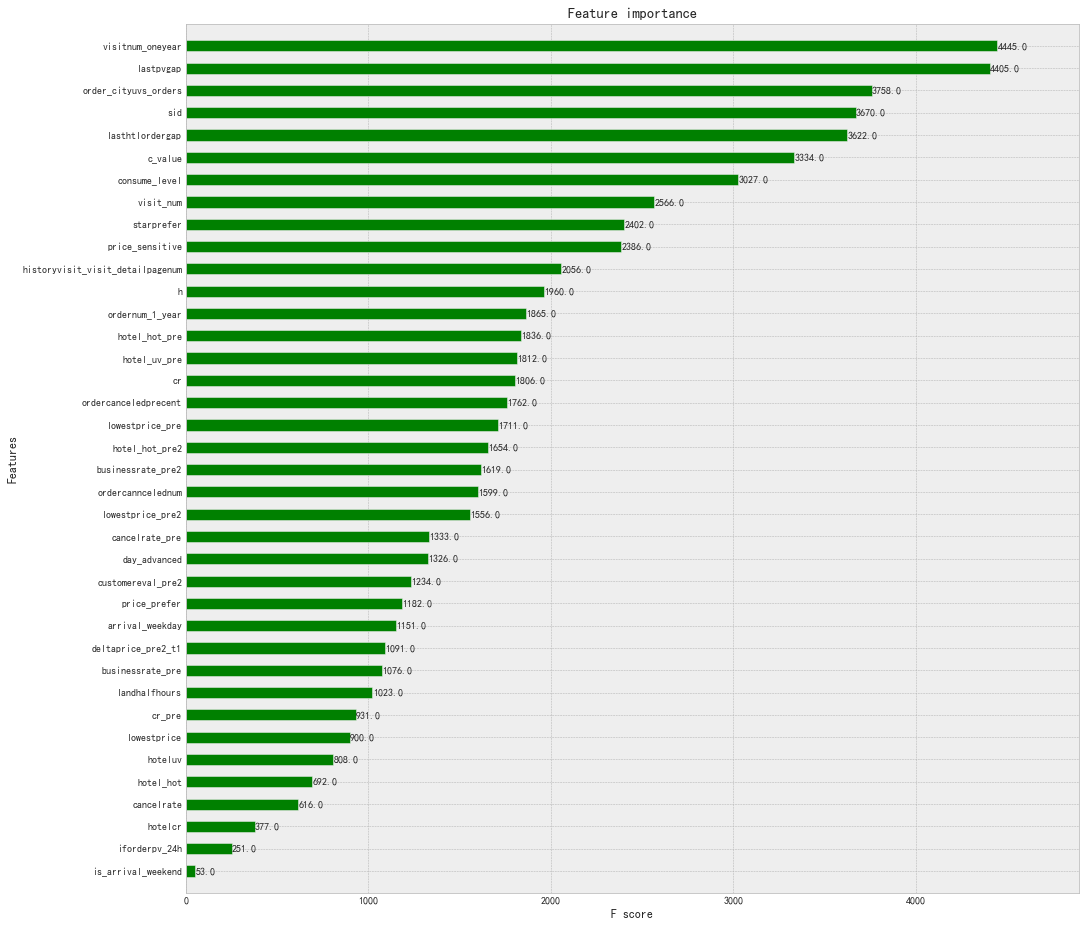

In [61]:
from xgboost import plot_importance

# 解决f特征名字
def ceate_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1
    outfile.close()
ceate_feature_map(x.columns)#40

fig, ax = plt.subplots(figsize=(16,16))
plot_importance(bst, height=0.5, ax=ax, color='green',fmap='xgb.fmap')
plt.show()

In [62]:
#RFM模型分析
#     R(Rencency):最近一次消费
#     F(Frequency):消费频率
#     M(Monetary):消费金额
# 由于本数据集并没有直接给出这三个指标，经过分析，选择选择lasthtlordergap(距离上次下单时长）、
# 和经过PCA降维处理的ordernum_1_year（用户年订单数）、consume_level（消费能力水平）分别作为R、F、M值，从而对用户群体进行分群
rfm_features = ['lasthtlordergap','ordernum_1_year','consume_level']
rfm = rawdf[rfm_features]
# 归一化（用于给RFM值打分）
#标准化和归一化的区别????!!!!
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(rfm)
rfm = pd.DataFrame(scaler.transform(rfm),columns = ['recency', 'frequency','monetary'])
rfm.head()

,recency,frequency,monetary
0,0.088971,0.007042,0.055043
1,0.088971,0.007042,0.055043
2,0.088971,0.007042,0.055043
3,0.088971,0.007042,0.055043
4,0.088971,0.007042,0.055043


In [63]:
#分箱
rfm['R'] = pd.qcut(rfm['recency'],2)
rfm['F'] = pd.qcut(rfm['frequency'], 2)
rfm['M'] = pd.qcut(rfm['monetary'], 2)
rfm.head()

,recency,frequency,monetary,R,F,M
0,0.088971,0.007042,0.055043,"(-0.001, 0.089]","(0.00704, 1.0]","(-0.001, 0.055]"
1,0.088971,0.007042,0.055043,"(-0.001, 0.089]","(-0.001, 0.00704]","(-0.001, 0.055]"
2,0.088971,0.007042,0.055043,"(-0.001, 0.089]","(-0.001, 0.00704]","(-0.001, 0.055]"
3,0.088971,0.007042,0.055043,"(-0.001, 0.089]","(-0.001, 0.00704]","(-0.001, 0.055]"
4,0.088971,0.007042,0.055043,"(-0.001, 0.089]","(-0.001, 0.00704]","(-0.001, 0.055]"


In [64]:
# 根据分箱情况进行编码，二分类可以直接用标签编码方式
from sklearn.preprocessing import LabelEncoder
rfm['R'] = LabelEncoder().fit_transform(rfm['R'])
rfm['F'] = LabelEncoder().fit_transform(rfm['F'])
rfm['M'] = LabelEncoder().fit_transform(rfm['M'])
rfm.head()

,recency,frequency,monetary,R,F,M
0,0.088971,0.007042,0.055043,0,1,0
1,0.088971,0.007042,0.055043,0,0,0
2,0.088971,0.007042,0.055043,0,0,0
3,0.088971,0.007042,0.055043,0,0,0
4,0.088971,0.007042,0.055043,0,0,0


In [65]:
#定义RFM模型，需要特别注意的是，R值代表距离上次消费时间间隔，值越小客户价值越高，与F和M值正好相反。
def get_label(r,f,m):
    if (r==0)&(f==1)&(m==1):
        return '高价值客户'
    if (r==1)&(f==1)&(m==1):
        return '重点保持客户'
    if((r==0)&(f==0)&(m==1)):
        return '重点发展客户'
    if (r==1)&(f==0)&(m==1):
        return '重点挽留客户'
    if (r==0)&(f==1)&(m==0):
        return '一般价值客户'
    if (r==1)&(f==1)&(m==0):
        return '一般保持客户'
    if (r==0)&(f==0)&(m==0):
        return '一般发展客户'
    if (r==1)&(f==0)&(m==0):
        return '潜在客户'

In [66]:
def RFM_convert(df):
    df['Label'] = df.apply(lambda x:get_label(x['R'], x['F'], x['M']), axis=1)
    
    df['R'] = np.where(df['R']==0, '高', '低')
    df['F'] = np.where(df['F']==1, '高', '低')
    df['M'] = np.where(df['M']==1, '高', '低')
    
    return df[['R','F','M','Label']]
rfm0 = RFM_convert(rfm)
rfm0.head()

,R,F,M,Label
0,高,高,低,一般价值客户
1,高,低,低,一般发展客户
2,高,低,低,一般发展客户
3,高,低,低,一般发展客户
4,高,低,低,一般发展客户


In [67]:
# 可视化
label_cnt = rfm0['Label'].value_counts().values
labels = rfm0['Label'].value_counts().index

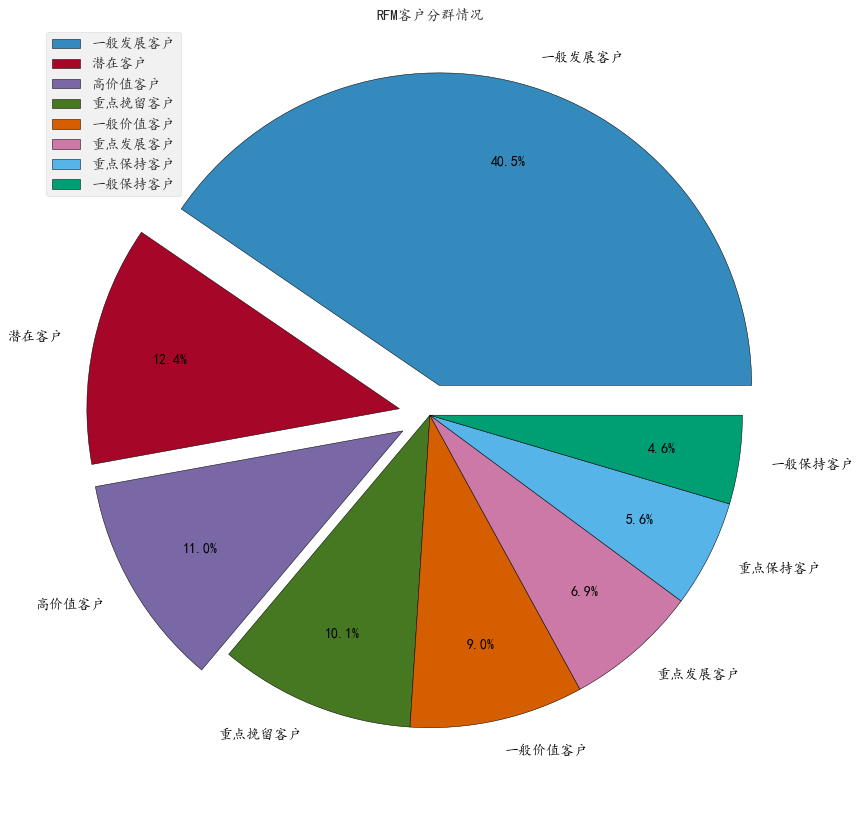

In [68]:
label_cnt = rfm0['Label'].value_counts().values
labels = rfm0['Label'].value_counts().index
explode=[0.1,0.1,0.1,0,0,0,0,0]
plt.figure(figsize=(14,18))
plt.pie(label_cnt, labels=labels,radius=1, explode=explode, autopct='%.1f%%',pctdistance=0.75,
        wedgeprops={'linewidth':0.5,'edgecolor':'black'}, 
        textprops={'fontsize':14,'color':'black'})
plt.title("RFM客户分群情况")
plt.legend(labels, fontsize=14, loc='best')
plt.show()

In [69]:
#上面RFM模型只用到数据集中lasthtlordergap、ordernum_1_year、consuming_level三个直接相关变量，但这些变量并不能完全涵盖用户特征，
#所以，接下来用K-Means聚类的方法引入其他变量进一步探究分析，观察不同类别客户的特征。

In [70]:
#K-means聚类
# visit_num=['decisionhabit_user','historyvisit_avghotelnum']        #用户访问数
# pca=PCA(n_components=1)
# rawdf['visit_num']=pca.fit_transform(rawdf[visit_num])
# rawdf.drop(visit_num,axis=1,inplace=True)

#选出刻画用户的重要指标
user_feature = ['ordercanncelednum','ordercanceledprecent','consume_level','starprefer','lasthtlordergap','lastpvgap','h','sid',
                'c_value','landhalfhours','price_sensitive','price_prefer','day_advanced','ordernum_1_year','visit_num']
user_attributes = rawdf[user_feature]

#指标数据标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
user_attributes = scaler.fit_transform(user_attributes)
#对选出来的指标k-means聚类，做用户画像
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters=3) 
Kmeans.fit(user_attributes)
k_char = Kmeans.cluster_centers_  # 得到每个分类的质心
persons = pd.DataFrame(k_char.T, index=user_feature,  columns=['0类','1类','2类'] )
persons

,0类,1类,2类
ordercanncelednum,-0.122495,-0.178418,2.573887
ordercanceledprecent,-0.332832,0.016866,0.491431
consume_level,1.804791,-0.309100,0.156161
starprefer,1.212678,-0.230474,0.400233
lasthtlordergap,0.237583,0.002587,-0.540380
lastpvgap,-0.101523,0.040694,-0.310876
h,0.028028,-0.003546,-0.013839
sid,0.476239,-0.170273,1.191015
c_value,0.618395,-0.218219,1.509198
landhalfhours,0.021106,-0.009758,0.081456


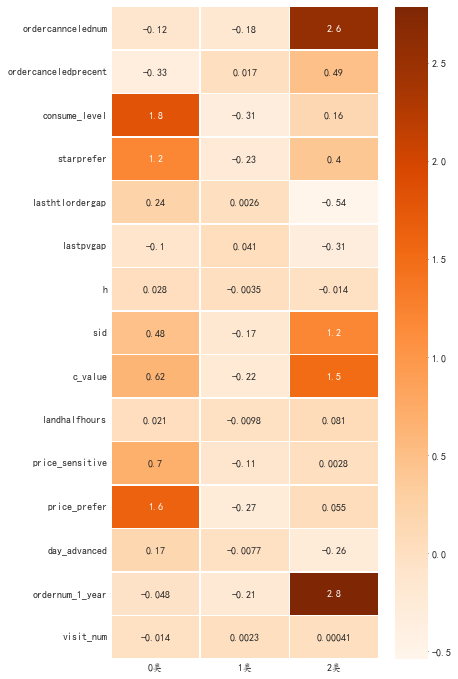

In [71]:
plt.figure(figsize=(6,12))
sns.heatmap(persons, xticklabels=True, yticklabels=True, square=False, linewidths=.5, annot=True, cmap='Oranges')
plt.show()

In [72]:
#h, cr, visit_num, visit_oneyear, consume_level, price_prefer, businessrate_pre2, hoteluv, starprefer
#0类：最近一年下单频率（ordernum_1_year）为三类用户中最高，但同时该类型用户的订单取消率也是最高的。
#他们的消费水平一般，对酒店的偏好也一般，但对价格敏感度不高，一般不会提前预定酒店。
#他们使用携程浏览酒店的次数较高，基本是老用户，并且用户价值是三类用户中中等的，定义为中等价值客户
#1类：可视化数据基本是白色的，客户消费水平和使用频率都是最低的，因此将这类用户归为“低价值用户”，但sid反映出他们大部分是新客户。
#2类：消费水平（consume_level）和价格偏好（price_prefer）为三类用户中最高，同时较高的星级偏好反应出该类型用户对酒店有一定的质量要求
#但同时该类型用户对价格的敏感度(price_sensitive)最高，最近一年下单频率是三类用户中最低的，上次消费时间间隔很久，
#他们一般会提前较早的时间预定酒店，并且订单取消率是三类用户中最低的，因此可以推测该类型用户为旅游客户，结合sid来看他们是高价值客户。


<Figure size 648x648 with 0 Axes>

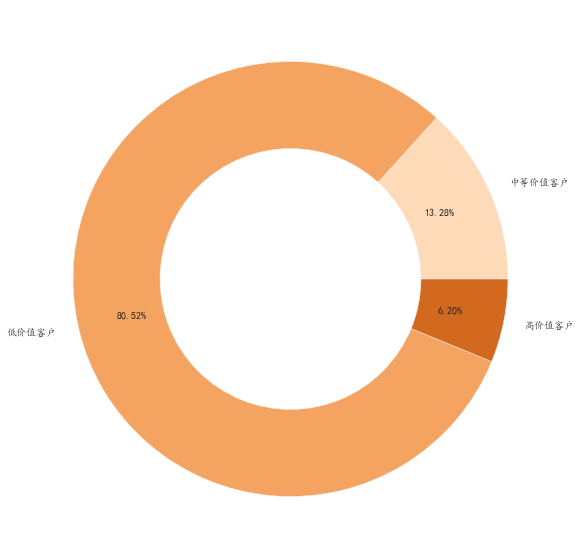

In [73]:
#对三种客户占比进行可视化
plt.figure(figsize=(9,9))
class_k = list(Kmeans.labels_)# 每个类别的用户个数
percents = [class_k.count(0)/len(user_attributes),
          class_k.count(1)/len(user_attributes),
          class_k.count(2)/len(user_attributes)] # 每个类别用户个数占比
fig,ax = plt.subplots(figsize = (10,10))
colors=['peachpuff','sandybrown','chocolate']
types = ['中等价值客户','低价值客户','高价值客户']
ax.pie(percents,radius = 1 , autopct='%.2f%%',pctdistance=0.75,colors=colors,labels=types)
ax.pie([1], radius=0.6,colors='w')
plt.show()